In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.transform import radon, iradon

In [2]:
angle = 0.9 # Angulo de cada proyeccion en degradianes
n_projections = int(360/0.9) # Hay 90/0.9 = 100 proyecciones (una cada 0.9 degradianes)

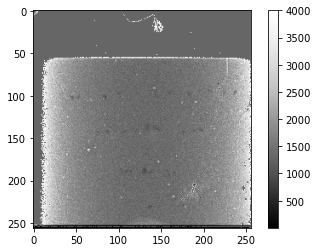

In [3]:
images = []

for i in range(n_projections):
    nombre_de_imagen = "raw28kV_" + str(i) + ".txt"
    im = np.genfromtxt(nombre_de_imagen)
    images.append(im)

RAWs = np.array(images)
del images

for im in RAWs:
    indices_superior = np.where(im > 4000.0)
    im[indices_superior[0],indices_superior[1]] = 0.0
    promedio = np.mean(im)
    indices_inferior = np.where(im <= 0.0)
    im[indices_inferior[0], indices_inferior[1]] = promedio

plt.imshow(RAWs[0], cmap=plt.cm.Greys_r)
plt.colorbar()

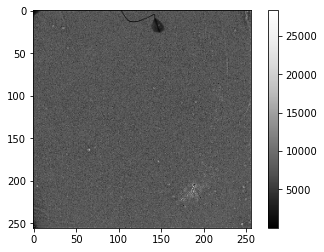

In [4]:
FF = np.transpose(np.genfromtxt("FF_OB_28kV.txt"))

promedio = np.mean(FF)
indices_inferior = np.where(FF <= 0.0)
FF[indices_inferior[0], indices_inferior[1]] = promedio
plt.imshow(FF, cmap=plt.cm.Greys_r)
plt.colorbar()

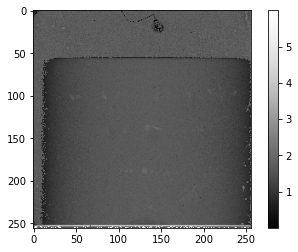

In [5]:
corr_images = np.log(FF/RAWs)
del RAWs
del FF

for im in corr_images:
    indices_superior = np.where(im > 6.0)
    im[indices_superior[0],indices_superior[1]] = 0.0
    promedio = np.mean(im)
    indices_inferior = np.where(im <= 0.0)
    im[indices_inferior[0], indices_inferior[1]] = promedio

plt.imshow(corr_images[0], cmap=plt.cm.Greys_r)
plt.colorbar()

In [6]:
sinograms = []
tamano_rodaja = 1 # en pixeles
tamano_detector = 256 # en pixeles
max_ind = int((tamano_detector/tamano_rodaja) - 1)


for ind in range(max_ind):
    projections = []
    for im in corr_images:
        rodaja = np.sum(im[tamano_rodaja*ind:tamano_rodaja*(ind+1), :], axis=0)
        projections.append(rodaja)
    
    projections = np.array(projections)
    sinograms.append(np.transpose(projections))

sinograms = np.array(sinograms)

del projections

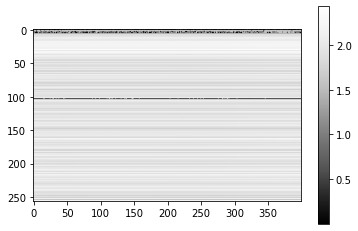

In [7]:
plt.imshow(sinograms[0], cmap=plt.cm.Greys_r)
plt.colorbar()

In [9]:
theta = np.linspace(0.0, 360.0, n_projections, endpoint=False)
images_end = []


for ind, sinogram in enumerate(sinograms):
    reconstruction_fbp = iradon(sinogram, theta=theta, filter='hann')

    #indices_superior = np.where(reconstruction_fbp > 0.035)
    #reconstruction_fbp[indices_superior[0],indices_superior[1]] = 0.0
    #promedio = np.mean(reconstruction_fbp)
    #indices_inferior = np.where(reconstruction_fbp <= 0.0)
    #reconstruction_fbp[indices_inferior[0], indices_inferior[1]] = promedio

    images_end.append(reconstruction_fbp)
    plt.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r, vmin=0.0, vmax=0.04) #, vmin=1, vmax=4)
    plt.colorbar()
    plt.savefig("rodaja_lim_{}.png".format(ind))
    plt.clf()

<Figure size 432x288 with 0 Axes>